# **IRIS DATASET(Classification)**

**IMPORT LIBRARIES**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**LOAD DATASET**

In [ ]:
# Load CSV Dataset
df = pd.read_csv("/content/Iris.csv")

**SHOW 5 ROWS**

In [ ]:
# Display first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**DISPLAY EACH SPECIES FROM DATA**

In [ ]:
# Display one sample row for each species
sample_species = df.groupby('Species').head(1)
sample_species

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
# Check dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


**DATASET SHAPE**

In [ ]:
# Display dataset shape
df.shape

(150, 6)

**CHECKING NULL VALUES**

In [ ]:
#Null Values
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**REMOVE "ID" COLUMN**

In [ ]:
# Drop the unnecessary 'Id' column
df.drop(columns=['Id'],inplace=True)

**COLUMN NAMES**

In [ ]:
# Select only numerical columns (excluding categorical data)
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print(num_cols)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


**BOX PLOT WITH OUTLIERS**

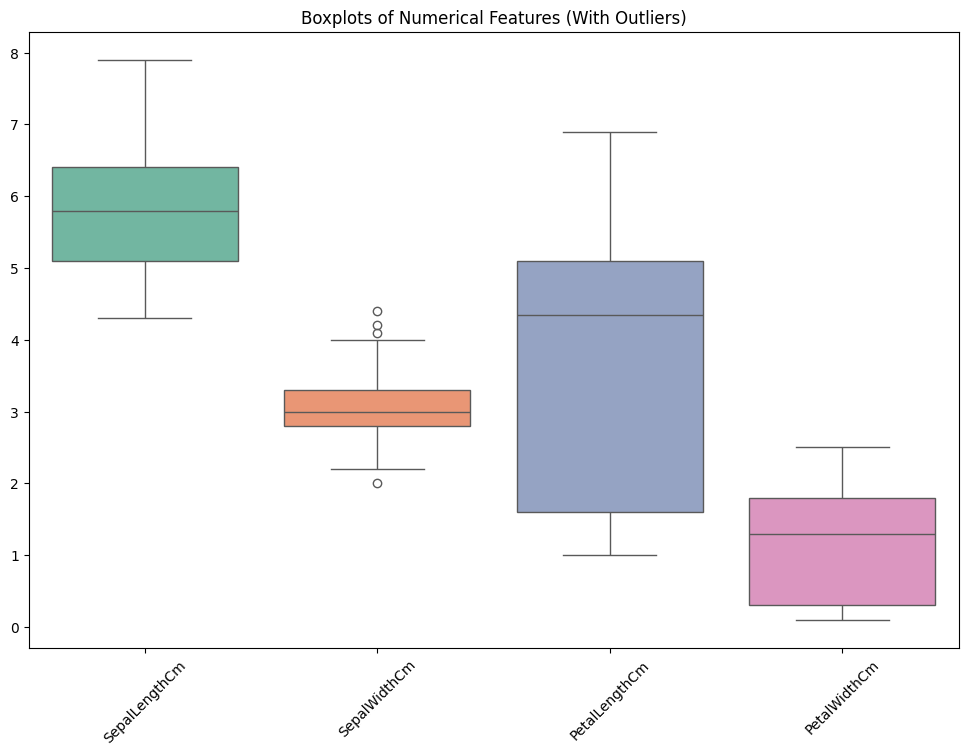

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features (With Outliers)")
plt.show()

**BOX PLOT WITHOUT OUTLIERS**

In [ ]:
# Outlier Removal using IQR method
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [ ]:
# Removing outliers from numerical columns
df_cleaned = remove_outliers(df, num_cols)

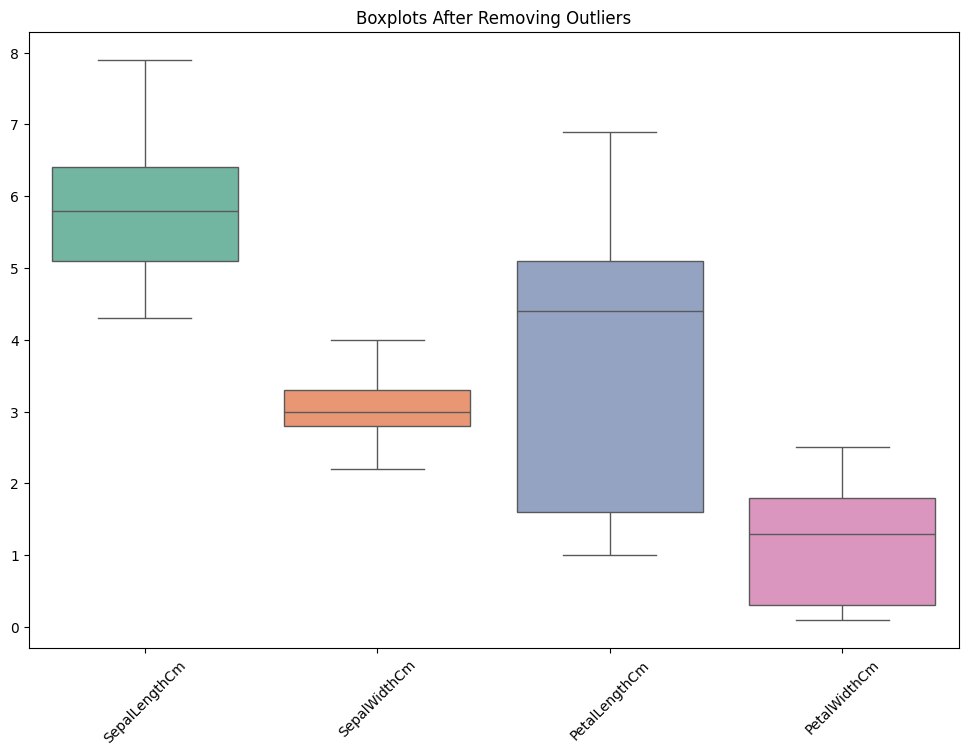

In [ ]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots After Removing Outliers")
plt.show()

**HISTOGRAM**

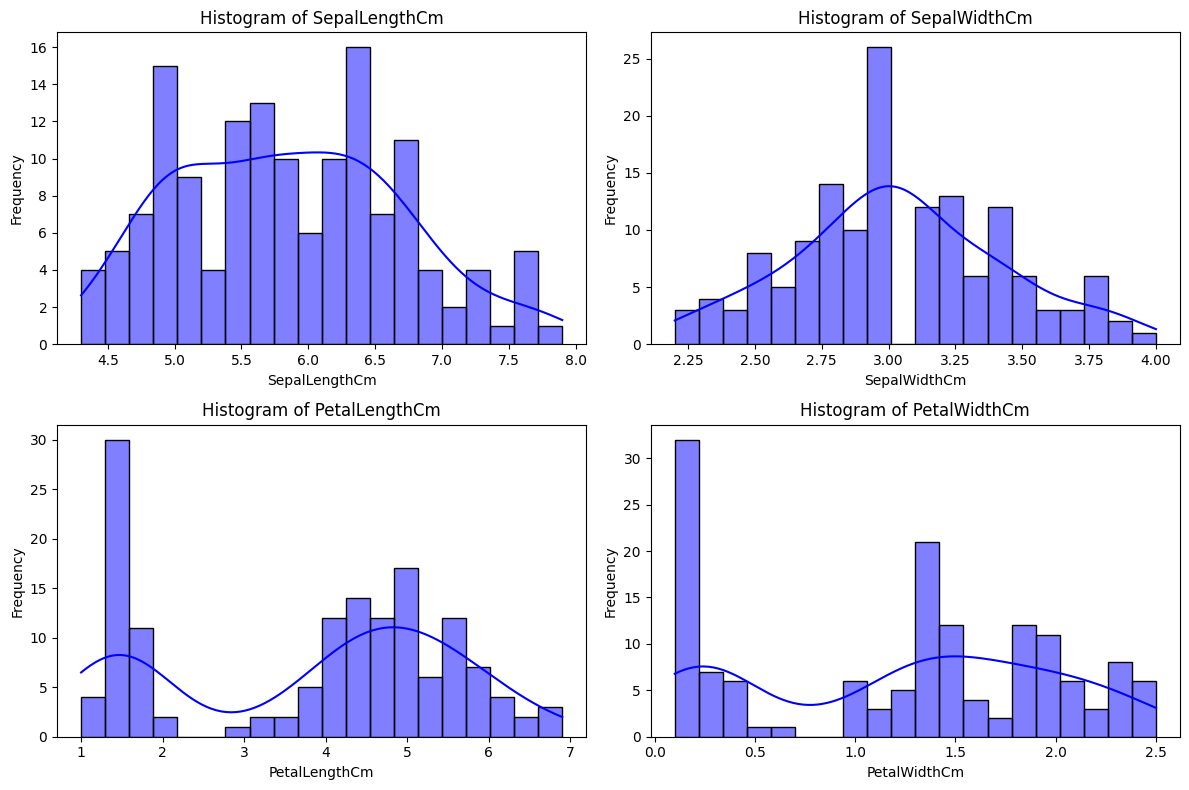

In [ ]:
# Histogram for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[col], kde=True, bins=20, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**SCATTER PLOTS**

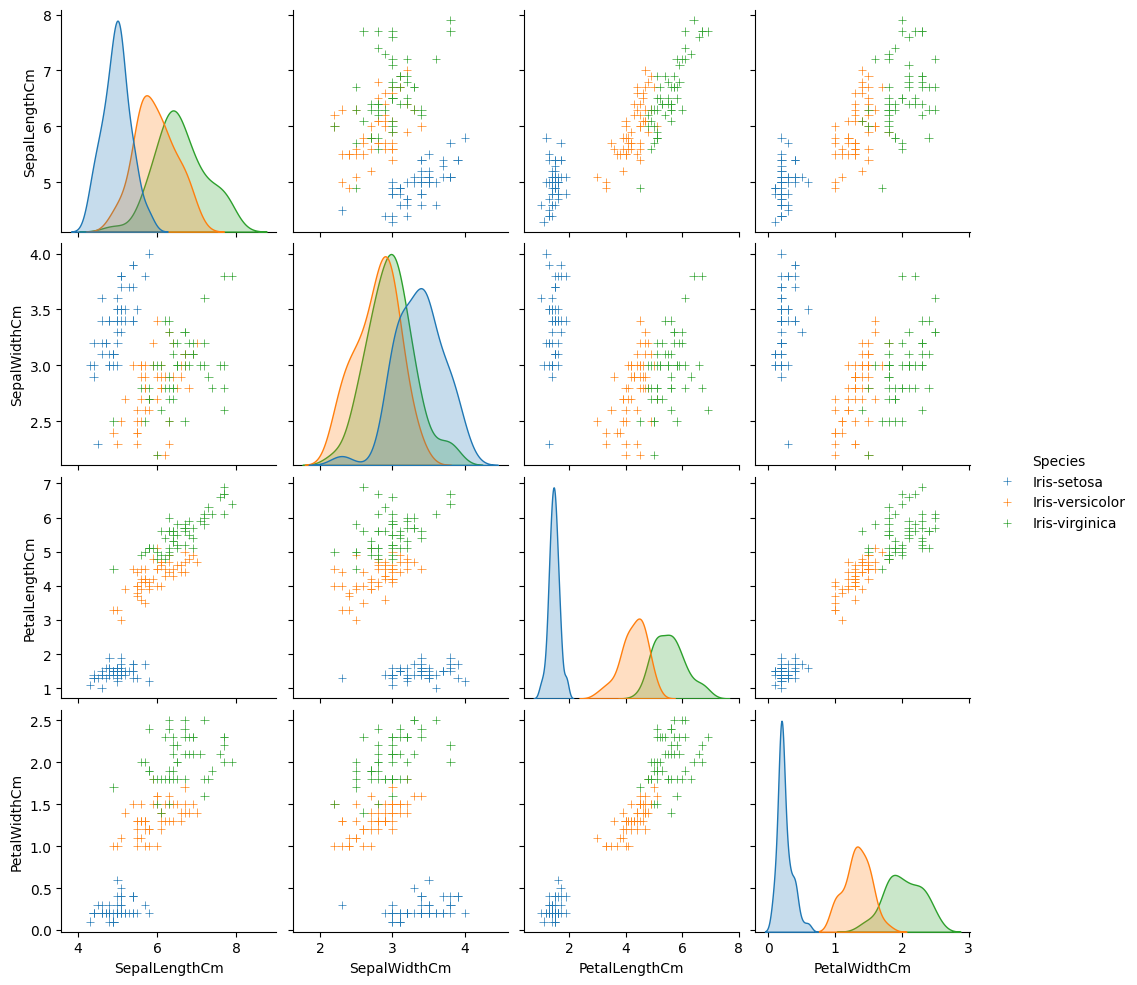

In [ ]:
# Scatter Plots for numerical columns
sns.pairplot(df_cleaned, hue='Species', markers='+')
plt.show()

**IQR**

In [ ]:
# Compute statistics
stats = df_cleaned.describe().T

# Compute Interquartile Range (IQR)
Q1 = df_cleaned[num_cols].quantile(0.25)
Q3 = df_cleaned[num_cols].quantile(0.75)
IQR = Q3 - Q1
stats["IQR"] = IQR

**SKEWNESS AND KURTOSIS**

In [ ]:
# Compute Skewness and Kurtosis
for col in num_cols:
    stats.loc[col, 'Skewness'] = skew(df_cleaned[col])
    stats.loc[col, 'Kurtosis'] = kurtosis(df_cleaned[col])

# Display computed statistics
print(stats)

               count      mean       std  min  25%  50%  75%  max  IQR  \
SepalLengthCm  146.0  5.856849  0.834093  4.3  5.1  5.8  6.4  7.9  1.3   
SepalWidthCm   146.0  3.036986  0.395145  2.2  2.8  3.0  3.3  4.0  0.5   
PetalLengthCm  146.0  3.807534  1.757117  1.0  1.6  4.4  5.1  6.9  3.5   
PetalWidthCm   146.0  1.219863  0.760365  0.1  0.3  1.3  1.8  2.5  1.5   

               Skewness  Kurtosis  
SepalLengthCm  0.275549 -0.606904  
SepalWidthCm   0.139361 -0.275840  
PetalLengthCm -0.320314 -1.352585  
PetalWidthCm  -0.147244 -1.311338  


In [ ]:
# Prepare data for ML models
X = df_cleaned.drop(columns=["Species"])
y = LabelEncoder().fit_transform(df_cleaned["Species"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TRAINING MODELS**

In [ ]:
# Train and compare models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}
accuracy_results = {}
classification_reports = {}
conf_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)
    classification_reports[model_name] = classification_report(y_test, y_pred)
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

**MODEL EVALUATION AND COMPARISON**

In [ ]:
# Print accuracy comparison
print("Model Accuracy:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.4f}")

# Print Classification Reports
for model, report in classification_reports.items():
    print(f"\nClassification Report for {model}:")
    print(report)

Model Accuracy:
Logistic Regression: 0.9333
Decision Tree: 0.9333
Random Forest: 0.9333

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Classification Report for Random Forest:
              prec

**CONFUSION MATRIX**

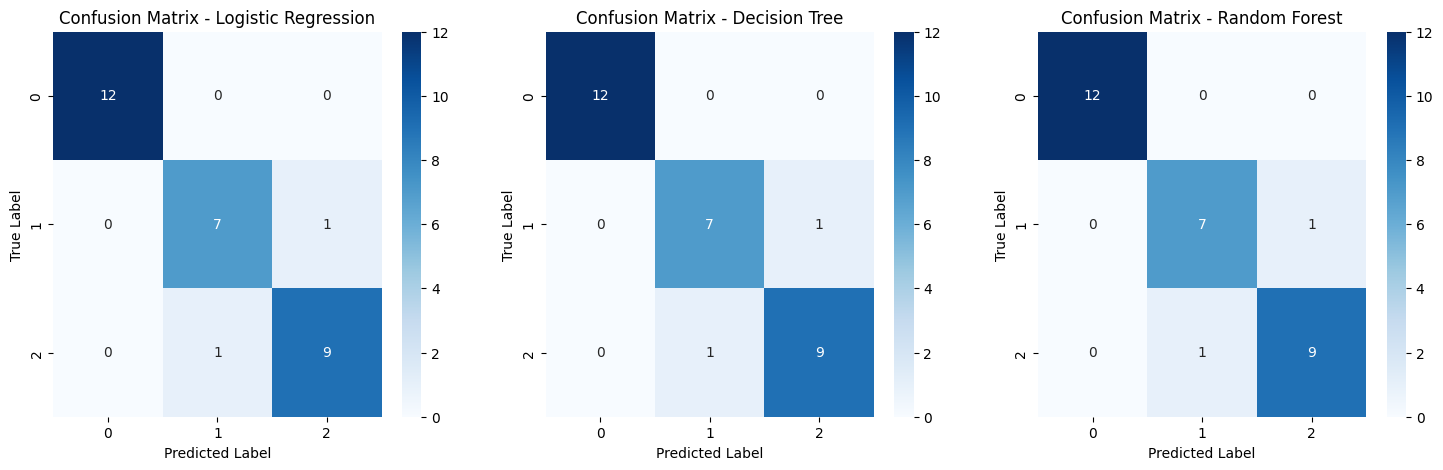

In [ ]:
# Plot Confusion Matrices for 3 ML Models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (model, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {model}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")
plt.show()

**BAR PLOT**

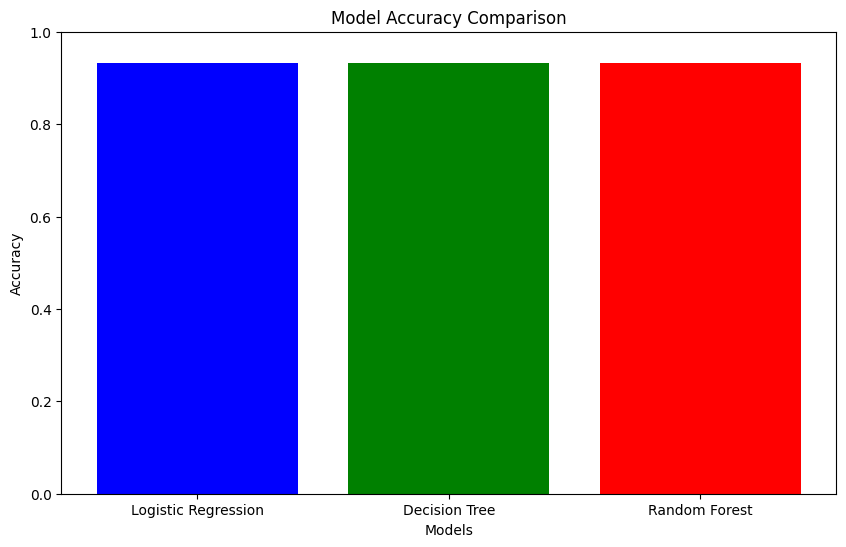

In [ ]:
# Bar plot for model comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()